In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

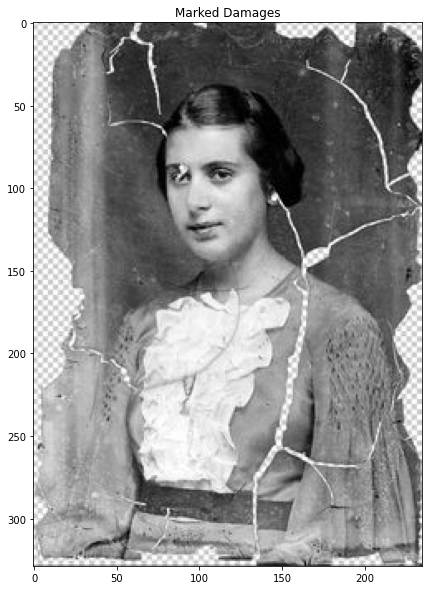

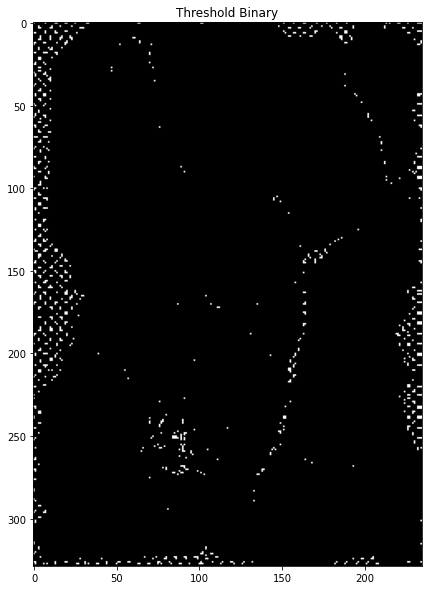

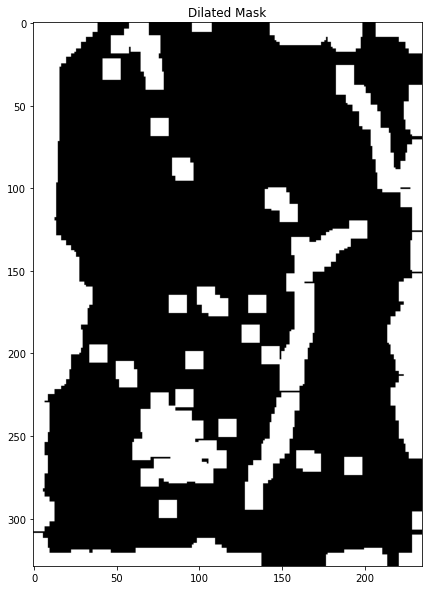

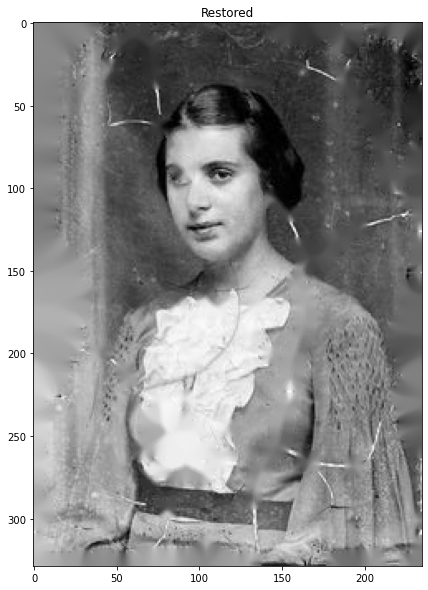

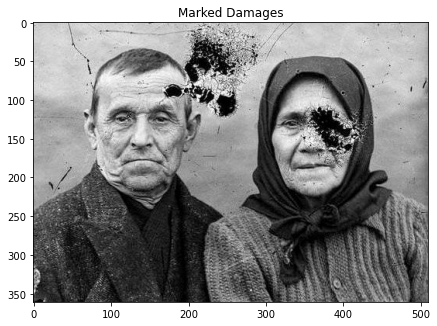

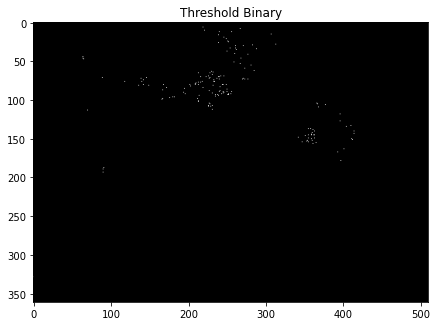

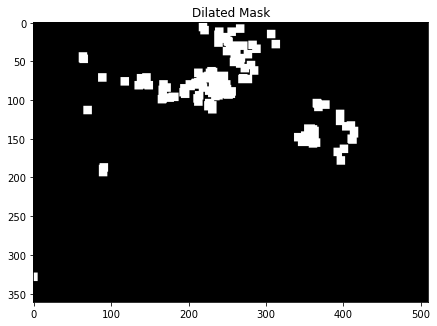

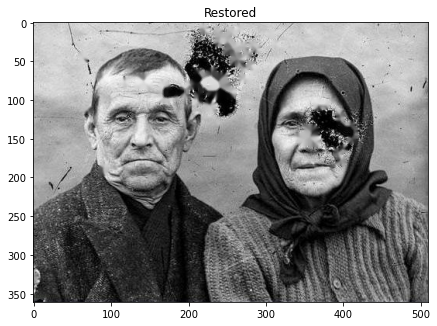

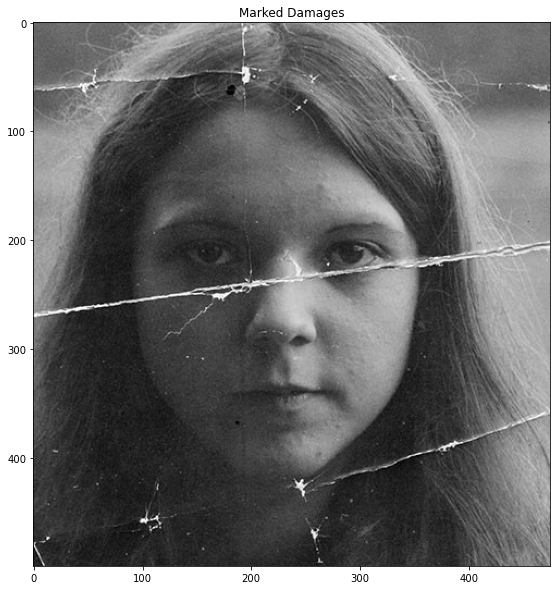

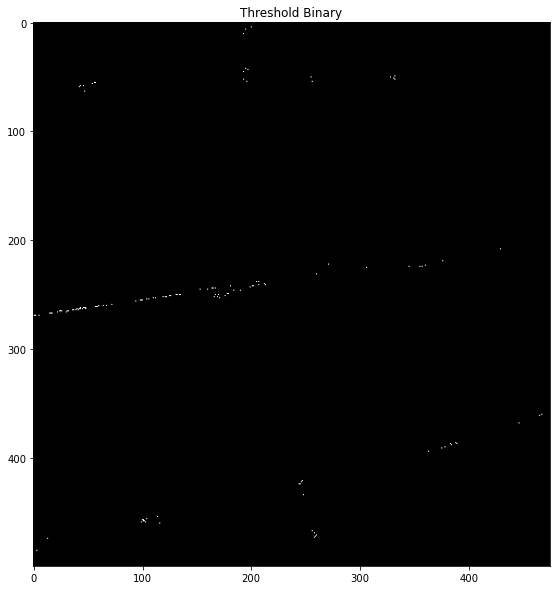

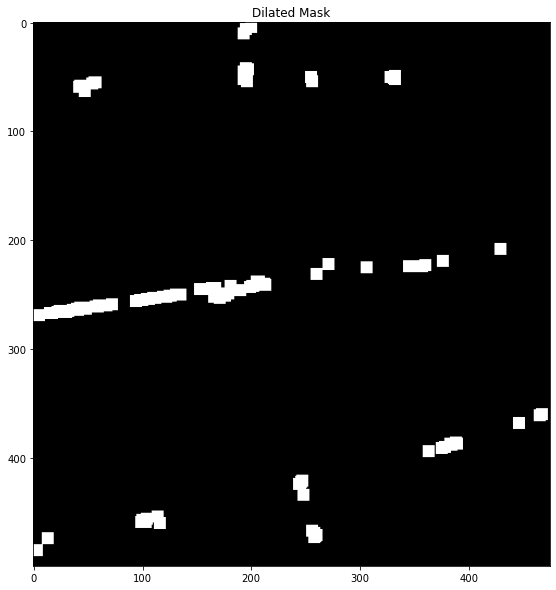

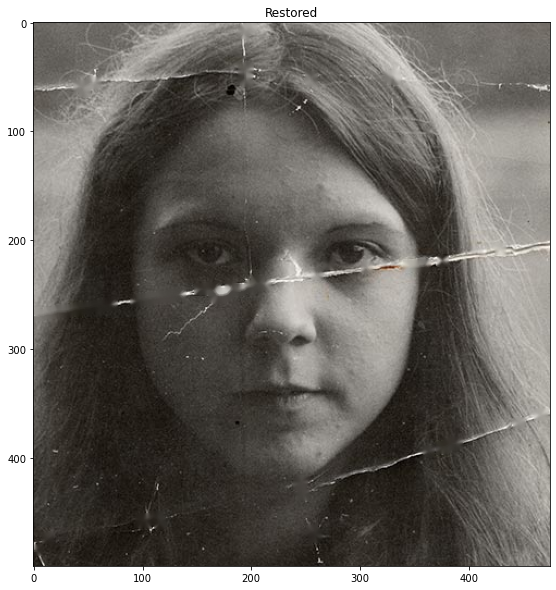

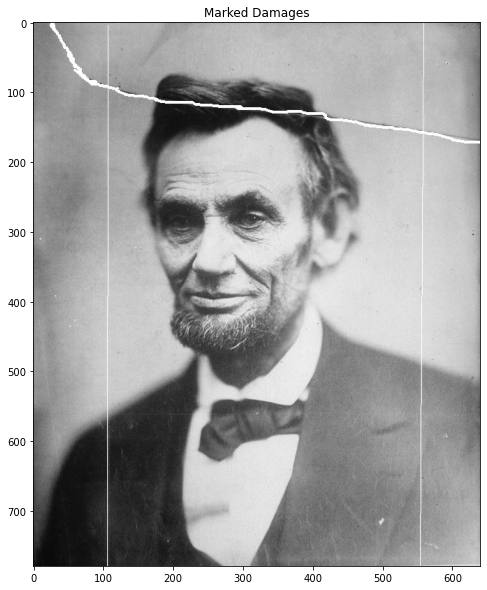

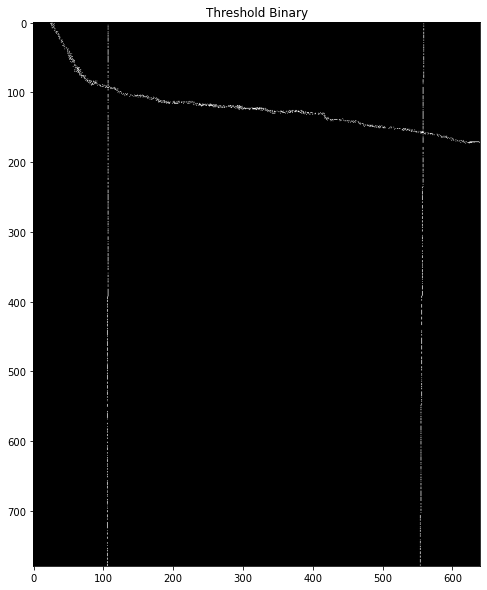

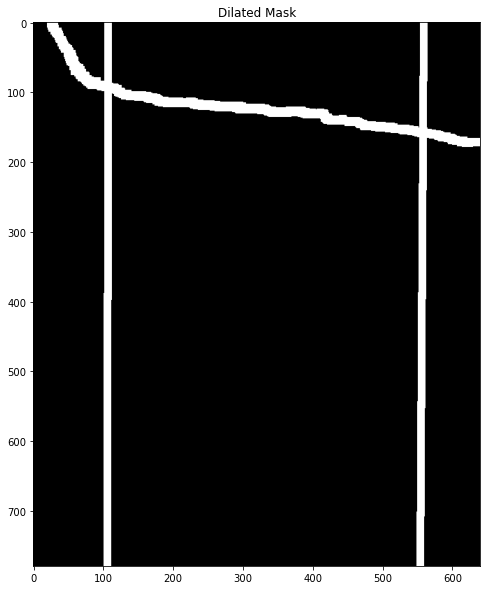

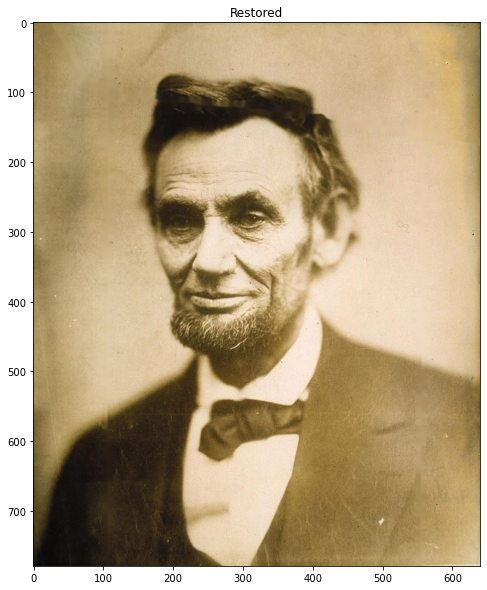

In [38]:
file_path = "../images/images/damaged_photos/"
damged_imgs = [f for f in listdir(file_path) if isfile(join(file_path, f))]

for image in damged_imgs:
        img = cv2.imread(file_path+image)
        grey = cv2.imread(file_path+image,0)
        imshow('Marked Damages', grey)
        ret, thresh1 = cv2.threshold(grey, 254, 255, cv2.THRESH_BINARY)
        imshow('Threshold Binary', thresh1)
        kernel = np.ones((11,11), np.uint8)
        mask = cv2.dilate(thresh1, kernel, iterations = 1)
        imshow('Dilated Mask', mask)

        restored = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

        imshow('Restored', restored)

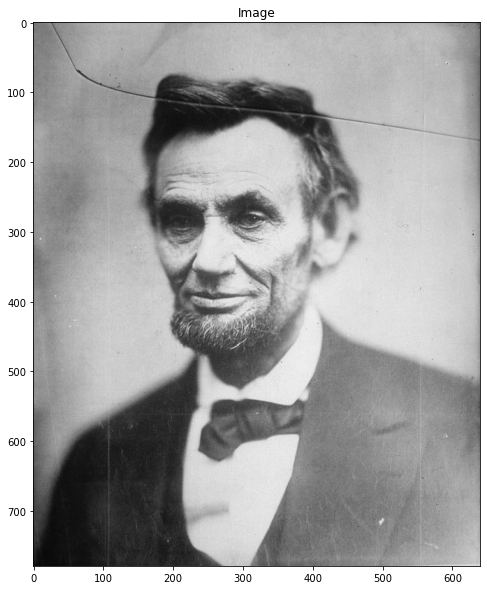

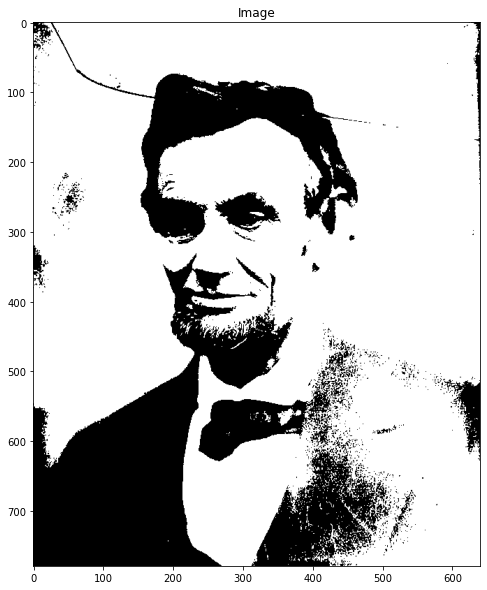

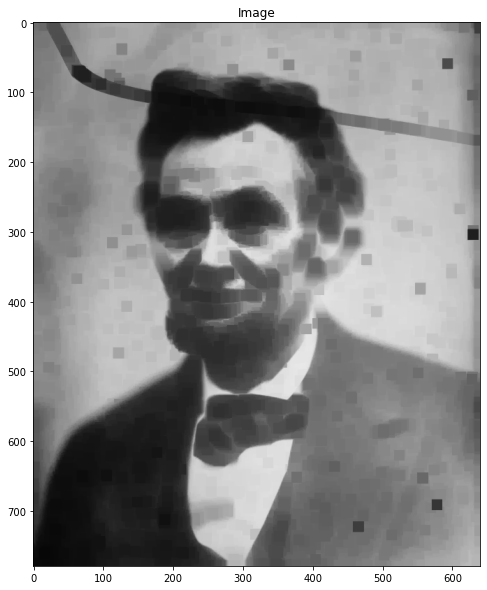

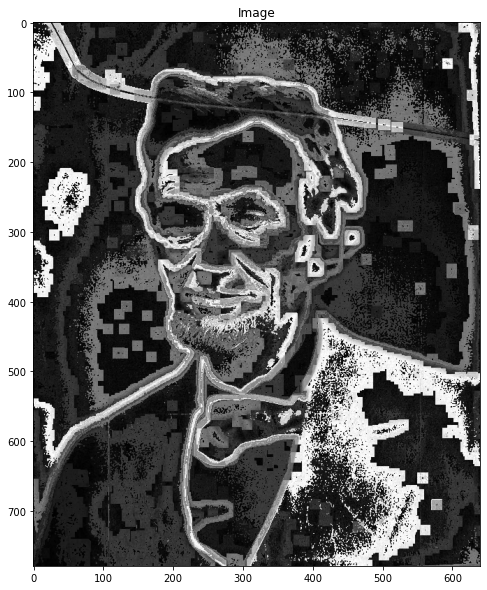

In [35]:
img = cv2.imread('../images/images/abraham.jpg',0)
imshow('Image',img)
kernel = np.ones((15, 15), np.uint8)

_,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Image',th)
Not = cv2.bitwise_not(th)
img_dilation = cv2.erode(img, kernel, iterations=1)
#gauss = cv2.GaussianBlur(th,(11,11),0)
imshow('Image',img_dilation)
add = cv2.bitwise_xor(img,img_dilation)
imshow('Image',add)